In [1]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import matplotlib              as mpl
import seaborn                 as sns
from pathlib import Path




In [2]:
#get data

DATA_PATH = Path('../../data/raw/chronic_kindey_disease.csv')

pd.set_option('display.max_columns', None)
df = pd.read_csv(DATA_PATH, na_values= '?')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,status
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

	1.Age(numerical)
  	  	age in years
		randomized/ not real?
 	2.Blood Pressure(numerical)
	    bp in mm/Hg
		uncontrolled high blood pressure causes kidney damage, in US 1 in 5 adults with high bp have CKD -- https://www.kidney.org/high-blood-pressure-and-chronic-kidney-disease
 	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
		normal range for urine specific gravity is 1.005 to 1.030
		decreased sg may be due to kidney failure, infection, or renal tubular necrosis - https://www.kidney.org/high-blood-pressure-and-chronic-kidney-disease
 	4.Albumin(nominal)
		al - (0,1,2,3,4,5)
		reference range for adults: 3.5-5g/dL. Low levels are associated with CKD - https://emedicine.medscape.com/article/2054430-overview#a2
 	5.Sugar(nominal)
		su - (0,1,2,3,4,5)
		high blood sugar from diabetes can damage blood vessels in the kidneys and nephrons (same for blood pressure)
		https://www.cdc.gov/diabetes/diabetes-complications/diabetes-and-chronic-kidney-disease.html?utm_source=chatgpt.com#:~:text=How%20diabetes%20causes%20CKD,doctor%20checks%20you%20for%20it.
 	6.Red Blood Cells(nominal)
		rbc - (normal,abnormal)
		anemia (low red blood cells) is caused by CKD due to kidneys not making enough EPO which tells body to make rbc- https://www.kidney.org/kidney-topics/anemia-and-chronic-kidney-disease
 	7.Pus Cell (nominal)
		pc - (normal,abnormal)
		white blood cells, signals infection, high number could indicate a UTI which affects the kidneys or a problem in kidney function https://www.ainuindia.org/pus-cells-in-urine/
 	8.Pus Cell clumps(nominal)
		pcc - (present,notpresent)
		collection of dead white blood cells, dead tissue and bacteria most commonly caused by UTIs - https://my.clevelandclinic.org/health/diseases/24383-pyuria
 	9.Bacteria(nominal)
		ba  - (present,notpresent)
		Reduced eGFR and albuminuria are associated with increased risk for infection-related mortality
		https://karger.com/ajn/article-abstract/34/4/330/32911/Chronic-Kidney-Disease-and-Risk-of-Death-from?redirectedFrom=fulltext
 	10.Blood Glucose Random(numerical)		
		bgr in mgs/dl
		this study confirms that BGR is a significant and stable predictor of 1-year mortality risk in patients with CKD stages 1–4
		https://www.nature.com/articles/s41598-025-91012-0
 	11.Blood Urea(numerical)	
		bu in mgs/dl
		blood urea nitrogen (BUN) test measures how much urea nitrogen is in your blood. It helps a healthcare provider determine if your kidneys are working as they should. BUN levels vary according to your age and sex. Abnormal levels may indicate a health condition, including kidney damage. If BUN numbers are higher than baseline, and if creatinine (a waste product from muscle tissue breakdown) is also high, then kidney failure is likely.
		https://my.clevelandclinic.org/health/diagnostics/17684-blood-urea-nitrogen-bun-test
 	12.Serum Creatinine(numerical)	
		sc in mgs/dl
		high levels suggest CKD. Creatinine is a waste product in your blood that comes from your muscles. Healthy kidneys filter creatinine out of your blood through your urine. --- https://www.kidneyfund.org/all-about-kidneys/tests/serum-creatinine-test

 	13.Sodium(numerical)
		sod in mEq/L
		In CKD, the kidneys inability to excrete sodium is a major cause of hypertension (HTN) and can lead to progression of the disease--https://www.jrnjournal.org/article/S1051-2276(18)30043-8/fulltext
 	14.Potassium(numerical)	
		pot in mEq/L
		Normal range 3.5-5. High potassium in the blood is called hyperkalemia, which may happen to people with advanced stages of chronic kidney disease (CKD) --https://davita.com/diet-nutrition/articles/potassium-and-chronic-kidney-disease/
 	15.Hemoglobin(numerical)
		hemo in gms
		Anemia is generally defined as a hemoglobin level of less than 13 g/dL in men and less than 12 g/dL in women.[1] Anemia of chronic renal disease, also known as anemia of chronic kidney disease (CKD), is a type of normocytic and normochromic anemia and hypoproliferative anemia, which is common in patients with renal disease -- https://www.ncbi.nlm.nih.gov/books/NBK539871/
 	16.Packed  Cell Volume(numerical)
		usually low (hematocrit) reflecting anemia from low EPO production
		https://www.apollohospitals.com/diagnostics-investigations/pcv-test#:~:text=Low%20PCV:,production%20and%20lowers%20the%20PCV.
 	17.White Blood Cell Count(numerical)
		wc in cells/cumm
		if low, your body isn't making enough
		if high, you have an infection and body is overproducing to fight infection
		https://kidneycareuk.org/kidney-disease-information/treatments/patient-info-understanding-your-ckd-blood-and-urine-test-results/
 	18.Red Blood Cell Count(numerical)	
		rc in millions/cmm
		should be aligned with hemoglobin, when kidney is damaged, not enought EPO is produced which tells body to make red blood cells so rbc count will be low
		https://kidneycareuk.org/kidney-disease-information/treatments/patient-info-understanding-your-ckd-blood-and-urine-test-results/
 	19.Hypertension(nominal)	
		htn - (yes,no)
		1 in 5 adults (20%) in the US with high blood pressure may have CKD. High blood pressure and the early stages of CKD usually does not cause any physical symptoms, which is an important reason to have regular blood pressure screenings diet well. --https://www.kidney.org/high-blood-pressure-and-chronic-kidney-disease
 	20.Diabetes Mellitus(nominal)	
		dm - (yes,no)
		Diabetes mellitus is among the leading causes of chronic kidney disease and end-stage kidney disease in the western world. It was the most common diagnosis for the initiation of renal replacement therapy in the United States in 2018, accounting for 47% of the cases
		-- https://pmc.ncbi.nlm.nih.gov/articles/PMC8111312/
 	21.Coronary Artery Disease(nominal)
		cad - (yes,no)
		Chronic kidney disease is an independent risk factor for the development of coronary artery disease (CAD) Coronary artery disease is the leading cause of morbidity and mortality in patients with CKD
		--https://pmc.ncbi.nlm.nih.gov/articles/PMC3941098/
 	22.Appetite(nominal)	
		appet - (good,poor)
		later stage CKD symptom is weight loss and poor appetite
		https://www.nhs.uk/conditions/kidney-disease/symptoms/
 	23.Pedal Edema(nominal)
		pe - (yes,no)
		swelling of feet / ankles is a symptom of late stage CKD
		https://www.nhs.uk/conditions/kidney-disease/symptoms/
 	24.Anemia(nominal)
		ane - (yes,no)
		anemia (low red blood cells) is caused by CKD due to kidneys not making enough EPO which tells body to make rbc- https://www.kidney.org/kidney-topics/anemia-and-chronic-kidney-disease
 	25.status (nominal)		
		class - (ckd,notckd)


In [ ]:
#clean the categorical columns for analysis
cat_cols2 = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

rbc: [nan 'normal' 'abnormal']
pc: ['normal' 'abnormal' nan]
pcc: ['notpresent' 'present' nan]
ba: ['notpresent' 'present' nan]
htn: ['yes' 'no' nan]
dm: ['yes' 'no' '\tno' nan]
cad: ['no' 'yes' nan]
appet: ['good' 'poor' nan]
pe: ['no' 'yes' nan]
ane: ['no' 'yes' nan]
status: ['ckd' 'ckd\t' 'notckd']


In [9]:
#fix the \t entries 
df['dm'] = df['dm'].replace('\tno', 'no')
df['status'] = df['status'].replace('ckd\t','ckd')

In [10]:
cat_cols2 = df.select_dtypes(include=['object']).columns
for col in cat_cols2:
    print(f"{col}: {df[col].unique()}")

rbc: [nan 'normal' 'abnormal']
pc: ['normal' 'abnormal' nan]
pcc: ['notpresent' 'present' nan]
ba: ['notpresent' 'present' nan]
htn: ['yes' 'no' nan]
dm: ['yes' 'no' nan]
cad: ['no' 'yes' nan]
appet: ['good' 'poor' nan]
pe: ['no' 'yes' nan]
ane: ['no' 'yes' nan]
status: ['ckd' 'notckd']


In [4]:
stat_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'status']
temp_stats = df[stat_cols]
temp_stats

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,status
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,notckd


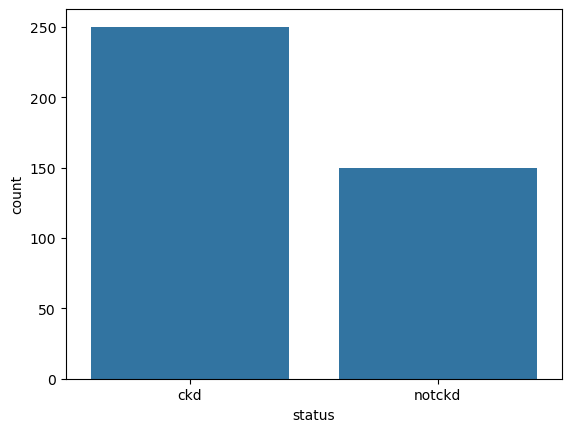

In [20]:
sns.countplot(x=df['status'])
plt.show()

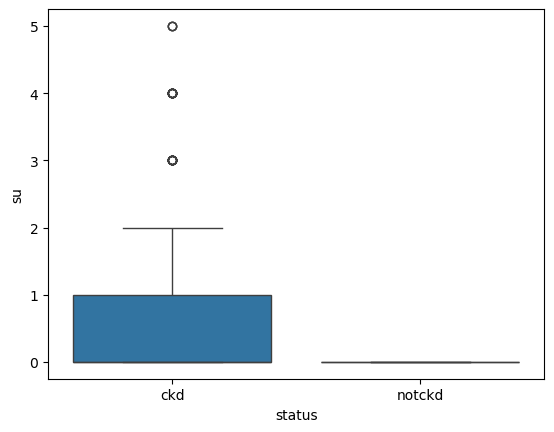

In [15]:
sns.boxplot(x = df['status'], y = df['su'])
plt.show()

In [16]:
print(df['su'].unique())

[ 0.  3.  4.  1. nan  2.  5.]


In [19]:
df.groupby('su')[['bp', 'sg']].describe()

bp                                                          sg  \
     count       mean        std   min   25%   50%   75%    max  count   
su                                                                       
0.0  281.0  74.697509  11.952180  50.0  70.0  70.0  80.0  120.0  290.0   
1.0   13.0  80.000000  11.547005  60.0  70.0  80.0  90.0   90.0   13.0   
2.0   18.0  83.888889  13.345583  60.0  80.0  80.0  97.5  100.0   18.0   
3.0   14.0  84.285714  10.163499  70.0  80.0  85.0  90.0  100.0   13.0   
4.0   12.0  84.166667  32.039275  60.0  70.0  70.0  82.5  180.0   12.0   
5.0    3.0  80.000000  10.000000  70.0  75.0  80.0  85.0   90.0    3.0   

                                                             
         mean       std    min     25%    50%    75%    max  
su                                                           
0.0  1.018293  0.005636  1.005  1.0150  1.020  1.025  1.025  
1.0  1.013462  0.004274  1.010  1.0100  1.010  1.015  1.020  
2.0  1.013611  0.003760  1.010  1.0100  1.015  1.015  1.020  
3.0  1.012692  0.005991  1.005  1.0100  1.010  1.015  1.025  
4.0  1.013333  0.002462  1.010  1.0100  1.015  1.015  1.015  
5.0  1.013333  0.002887  1.010  1.0125  1.015  1.015  1.015

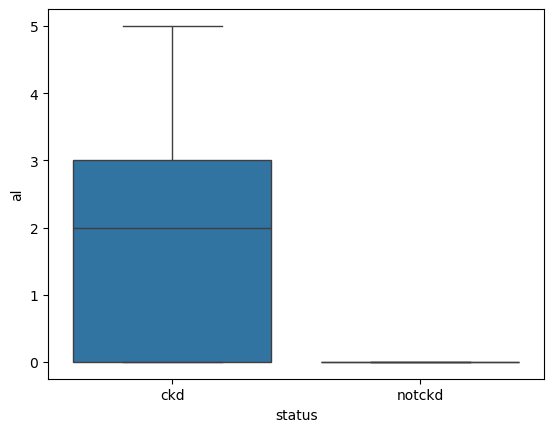

In [14]:
sns.boxplot(x = df['status'], y = df['al'])
plt.show()

In [17]:
print(df['al'].unique())

[ 1.  4.  2.  3.  0. nan  5.]


In [ ]:
# This statement allow to display plots without asking to 
#%matplotlib inline
# you can also add the following line for making pretty-loking plots
plt.style.use('ggplot')

df = pd.read_csv(directory_path = './data/raw/chronic_kidney_disease.csv', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(20)